# Energy spectrum

I calculate the energy spectrum of bacterial turbulence in this notebook. Energy spectrum quantifies the energy distribution over different length scales, $\lambda=2\pi/k$, where $k$ is the wavenumber. To obtain the energy spectrum, we first calculate the Fourier trransform of the 2D velocity field $v_x(x, y)$ and $v_y(x, y)$ to obtain $u_k(k_x, k_y)$ and $v_k(k_x, k_y)$. The point wise kinetic energy density in the k-space is then computed as $E(k_x, k_y) = \langle u_k(k_x, k_y)u^*_k(k_x, k_y)+v_k(k_x, k_y)v_k^*(k_x, k_y)\rangle/2$, where \* represents the complex conjugate. Finally, the energy spectrum E(k) is obtained by summing up $E(k_x, k_y)$ at a constant $k=(k_x^2+k_y^2)^{1/2}$. 

An alternative way to calculate $E(k)$ is through the Fourier transform of the two-point velocity correlation function $\langle v(r_0)\cdot v(r_0+r)\rangle_{r_0}$, which yields quantitatively similar results.

## 0 Packages

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from corr_utils import *
import typesetting.main as tm
tm.prl('1-column-2-panel')
from corrLib import readdata, corrS

## 1 Fourier transform of velocity

The Fourier transform of velocity field can be computed easily by using numpy built-in functions.

In [3]:
pivData = pd.read_csv(r'E:\moreData\08032020\piv_imseq\01\3370-3371.csv')

row = len(pivData.y.drop_duplicates())
col = len(pivData.x.drop_duplicates())
X = np.array(pivData.x).reshape((row, col))
Y = np.array(pivData.y).reshape((row, col))
U = np.array(pivData.u).reshape((row, col))
V = np.array(pivData.v).reshape((row, col))

In [95]:
u_fft = np.fft.fft2(U)
v_fft = np.fft.fft2(V)

Below is a preview of the fft of velocity field. Four corners correspond to low frequency signals, while center corresponds to high frequency signals. As is shown in the plot, low frequency signals has a higher amplitude than high frequency ones.

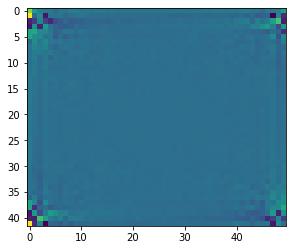

In [18]:
plt.imshow(u_ft.real)

## 2 Compute point-wise kinetic energy density in k-space

<font color='red'> I don't understand the meaning of the angle bracket $\langle\rangle$ in the formula of energy $E$. From what I understand, this $E$ is a point-wise energy and no spatial average is taken. What average is this?</font>

In [96]:
E = (u_fft * u_fft.conjugate() + v_fft * v_fft.conjugate()) / 2

In [121]:
def compute_energy_density(pivData):
    """
    Compute kinetic energy density in k space from piv data.
    
    Args:
    pivData -- piv data
    
    Returns:
    E -- kinetic energy field in k space
    
    Test:
    pivData = pd.read_csv(r'E:\moreData\08032020\piv_imseq\01\3370-3371.csv')
    compute_energy_density(pivData)
    """
    
    row = len(pivData.y.drop_duplicates())
    col = len(pivData.x.drop_duplicates())
#     X = np.array(pivData.x).reshape((row, col))
#     Y = np.array(pivData.y).reshape((row, col))
    U = np.array(pivData.u).reshape((row, col))
    V = np.array(pivData.v).reshape((row, col))
    
    u_fft = np.fft.fft2(U)
    v_fft = np.fft.fft2(V)
    
    E = (u_fft * u_fft.conjugate() + v_fft * v_fft.conjugate()) / 2
    
    return E

In [122]:
pivData = pd.read_csv(r'E:\moreData\08032020\piv_imseq\01\3370-3371.csv')
compute_energy_density(pivData)

array([[8.82584565e+07+0.j, 1.70565208e+08+0.j, 3.68561469e+07+0.j, ...,
        1.41594659e+07+0.j, 3.68561469e+07+0.j, 1.70565208e+08+0.j],
       [1.63658336e+08+0.j, 2.94427646e+07+0.j, 8.69557584e+07+0.j, ...,
        5.71590726e+07+0.j, 2.57775832e+07+0.j, 1.04051077e+08+0.j],
       [5.85742300e+07+0.j, 2.63654794e+07+0.j, 2.68530100e+07+0.j, ...,
        2.57109177e+07+0.j, 1.01935099e+08+0.j, 8.71585781e+07+0.j],
       ...,
       [5.34223042e+07+0.j, 3.60180055e+07+0.j, 2.11529533e+07+0.j, ...,
        5.62385163e+07+0.j, 2.96305009e+07+0.j, 9.06512456e+06+0.j],
       [5.85742300e+07+0.j, 8.71585781e+07+0.j, 1.01935099e+08+0.j, ...,
        1.34906964e+07+0.j, 2.68530100e+07+0.j, 2.63654794e+07+0.j],
       [1.63658336e+08+0.j, 1.04051077e+08+0.j, 2.57775832e+07+0.j, ...,
        3.66170161e+07+0.j, 8.69557584e+07+0.j, 2.94427646e+07+0.j]])

## 3 Wavenumber magnitude field

In order to apply the isotropic assumption, we need to generate a wavenumber $k$ field (magnitude), in correspondance with the fft field. For example, for a 5-by-5 fft field, the corresponding $k_x$ field is
$$\begin{matrix}
0 & 1 & 2 & -2 & -1 \\
0 & 1 & 2 & -2 & -1 \\
0 & 1 & 2 & -2 & -1 \\
0 & 1 & 2 & -2 & -1 \\
0 & 1 & 2 & -2 & -1 \\
\end{matrix}
$$
the corresponding $k_y$ field is:
$$\begin{matrix}
0 & 0 & 0 & 0 & 0 \\
1 & 1 & 1 & 1 & 1 \\
2 & 2 & 2 & 2 & 2 \\
-2 & -2 & -2 & -2 & -2 \\
-1 & -1 & -1 & -1 & -1 \\
\end{matrix}
$$

In [24]:
np.fft.fftfreq(5, d=1)

array([ 0. ,  0.2,  0.4, -0.4, -0.2])

In [25]:
def compute_wavenumber_field(shape, d):
    """
    Compute the wave number field Kx and Ky, and magnitude field k. 
    Note that this function works for even higher dimensional shape.
    
    Args:
    shape -- shape of the velocity field and velocity fft field, tuple
    d -- sample spacing. This is the distance between adjacent samples, for example, velocities in PIV. 
        The resulting frequency space has the unit which is inverse of the unit of d. The preferred unit of d is um.
    
    Returns:
    k -- wavenumber magnitude field
    K -- wavenumber fields in given dimensions
    
    Test:
    shape = (5, 5)
    k, K = compute_wavenumber_field(shape, 0.2)
    """
    
    for num, length in enumerate(shape):
        kx = np.fft.fftfreq(length, d=d)
        if num == 0:            
            k = (kx,)
        else:
            k += (kx,)
        
    K = np.meshgrid(*k, indexing='ij')
    
    for num, k1 in enumerate(K):
        if num == 0:
            ksq = k1 ** 2
        else:
            ksq += k1 ** 2
    
    k_mag = ksq ** 0.5
    
    return k_mag, K

In [29]:
shape = (5, 5)
k, K = compute_wavenumber_field(shape, 0.2)

In [30]:
K

[array([[ 0.,  0.,  0.,  0.,  0.],
        [ 1.,  1.,  1.,  1.,  1.],
        [ 2.,  2.,  2.,  2.,  2.],
        [-2., -2., -2., -2., -2.],
        [-1., -1., -1., -1., -1.]]), array([[ 0.,  1.,  2., -2., -1.],
        [ 0.,  1.,  2., -2., -1.],
        [ 0.,  1.,  2., -2., -1.],
        [ 0.,  1.,  2., -2., -1.],
        [ 0.,  1.,  2., -2., -1.]])]

**Test unit of wavenumber field**

I use the numpy built-in fft methods to calculate the Fourier transform of velocity field. The frequency or wavenumber field is also given by the numpy functions. However, I don't know yet what is the unit of the wavenumber field that is given to me by the built-in function. Here, I do a small test using a sin wave and the result should tell me the wave number. 

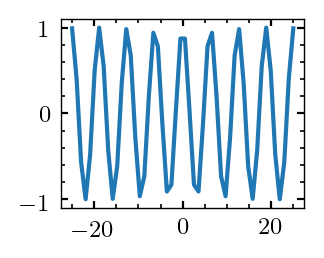

In [105]:
plt.figure(dpi=200)
x = np.linspace(-25, 25)
y = np.cos(x)
fft = np.fft.fft(y)
freq = np.fft.fftfreq(50, 1)
plt.plot(x, y)

Text(0, 0.5, 'amp')

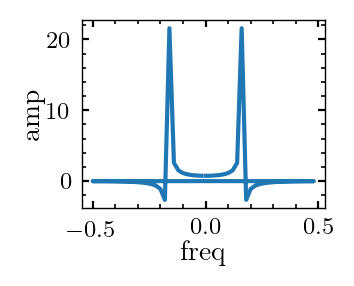

In [106]:
plt.figure(dpi=200)
plt.plot(freq, fft)
plt.xlabel('freq')
plt.ylabel('amp')

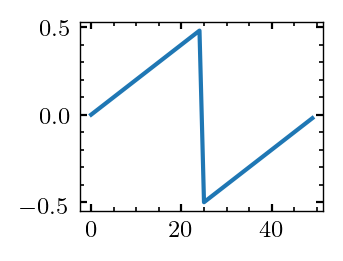

In [52]:
plt.figure(dpi=200)
plt.plot(freq)

The highest peaks are at $\pm 0.15$, as shown in the figure below.
<img src='temp_data\FFTfreq.jpg'>

The real period of the cos function $f(x) = cos(x)$ is $2\pi$. The corresponding frequency is $1/2\pi = 0.159$, very close to 0.15. Thus, the default np.fft.fftfreq() function returns the "frequency". This frequency measures how many wave period there can be in one unit length, so it is equivalent to "wavenumber".

## 4 Plot $E$ as a function of $k$

In [104]:
shape = E.shape
k, K = compute_wavenumber_field(shape)

In [106]:
ind = np.argsort(k.flatten())

In [111]:
k_plot = k.flatten()[ind]
E_plot = E.real.flatten()[ind]

[]

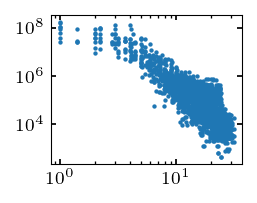

In [120]:
plt.plot(k_plot, E_plot, marker='o', ls='', markersize=1)
plt.loglog()

In [113]:
(21**2+25**2)**0.5

32.64965543462902

## 5 Energy spectrum function

In [123]:
def energy_spectrum(pivData):
    """
    Compute energy spectrum (E vs k) from pivData.
    
    Args:
    pivData -- piv data
    
    Returns:
    es -- energy spectrum, DataFrame (k, E)
    """
    
    E = compute_energy_density(pivData)
    k, K = compute_wavenumber_field(E.shape)
    
    ind = np.argsort(k.flatten())
    k_plot = k.flatten()[ind]
    E_plot = E.real.flatten()[ind]
    
    es = pd.DataFrame(data={'k': k_plot, 'E': E_plot})
    
    return es

In [125]:
%%time
energy_spectrum(pivData)

Wall time: 4 ms


,k,E
0,0.000000,8.825846e+07
1,0.000000,1.636583e+08
2,0.000000,1.705652e+08
3,0.000000,2.944276e+07
4,1.000000,8.695576e+07
...,...,...
2095,30.610456,9.544344e+03
2096,31.240999,6.593195e+03
2097,31.240999,1.921320e+03
2098,31.240999,1.842301e+04


**An alternative way to calculate energy spectrum**

By virtue of the Wiener-Khinchine theorem, energy spectrum $E(k)$ can be estimated by Fourier transformation of the equal-time two-point velocity correlation function, yielding
$$
E_d(k)=\frac{k^{d-1}}{C_d}\int d^d R e^{-ikR} \langle v(t, r)\cdot v(t, r+R)\rangle
$$
where $C_2=2\pi$ and $C_3=4\pi$.

Wensink (2012)

In two dimensions, the formula becomes 
$$
E(k)=\frac{k}{2\pi}\int d^2 R e^{-ikR} \langle v(t, r)\cdot v(t, r+R)\rangle
$$

[]

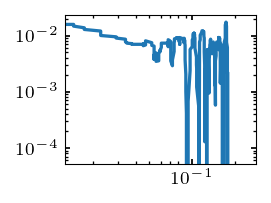

In [102]:
pivData = pd.read_csv(r'D:\density_fluctuations\08032020\piv_imseq\02\0000-0001.csv')

row = len(pivData.y.drop_duplicates())
col = len(pivData.x.drop_duplicates())
X = np.array(pivData.x).reshape((row, col))
Y = np.array(pivData.y).reshape((row, col))
U = np.array(pivData.u).reshape((row, col))
V = np.array(pivData.v).reshape((row, col))

XS, YS, CA, CV = corrS(X, Y, U, V)

k, K = compute_wavenumber_field(XS.shape, 25*0.33)

E = k / 2 / np.pi * np.fft.fft2(CV)

ind = np.argsort(k.flatten())
k_plot = k.flatten()[ind]
E_plot = E.real.flatten()[ind]

plt.plot(k_plot*3, savgol_filter(E_plot, 51, 3))
plt.loglog()

In [77]:
help(corrS)

Help on function corrS in module corrLib:

corrS(X, Y, U, V)



## 6 Batch process

In [131]:
piv_master_folder = r'E:\moreData\08032020\piv_imseq'
es_master_folder = r'E:\moreData\08032020\energy_spectrum'
sfL = next(os.walk(piv_master_folder))[1]
for sf in sfL:
    piv_folder = os.path.join(piv_master_folder, sf)
    es_folder = os.path.join(es_master_folder, sf)
    if os.path.exists(es_folder) == False:
        os.makedirs(es_folder)
    l = readdata(piv_folder, 'csv')
    l_crop = l[l.index>l.index.max()*0.8]
    for num, i in l_crop.iterrows():
        pivData = pd.read_csv(i.Dir)
        es = energy_spectrum(pivData)
        es.to_csv(os.path.join(es_folder, i.Name+'.csv'), index=False)

## 7 Summarize data
After the batch process, I have multiple energy spectrum data for each sample. To summarize, I compress the data for each sample into one energy spectrum by averaging over all data for this sample. This average will be saved to a summary .csv file under 'energy_spectrum' folder'.

In [111]:
folder = r'D:\density_fluctuations\08052020\energy_spectrum'
sfL = next(os.walk(folder))[1]
count = 0
for sf in sfL:
    es_folder = os.path.join(folder, sf)
    l = readdata(es_folder, 'csv')
    for num, i in l.iterrows():
        if num == 0:
            data = pd.read_csv(i.Dir)
        else:
            data += pd.read_csv(i.Dir)
    data /= num + 1
    if count == 0:
        summary = data.assign(sample=sf)
    else:
        summary = summary.append(data.assign(sample=sf))
    count += 1

In [110]:
summary.to_csv(os.path.join(folder, 'summary.csv'), index=False)

In [14]:
summary

,E,k,sample
0,7.013958e+07,0.000000,00
1,8.346525e+07,0.000000,00
2,9.665691e+07,0.000000,00
3,8.152549e+07,0.000000,00
4,5.723459e+07,1.000000,00
5,8.346525e+07,1.000000,00
6,4.492389e+07,1.000000,00
7,8.669344e+07,1.000000,00
8,7.331938e+07,1.000000,00
9,8.669344e+07,1.000000,00
